#Step 1: Import necessary libraries
###The implementation requires to import numpy, sklearn, FastICA and matplotlib.



In [1]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

#Step 2: Generate Random Data and Mix the Signals

Random seed is set to generate random numbers.

Samples and Time parameters are defined.

Synthetic signals are generated and then combined to single matrix “S”.
Noise is added to each element of the matrix.

Matrix “A” is defined with coefficients the represent how the original signals are combined to form observed signals.

The observed signals are obtained by multiplying the matrix “S” by the transpose of the mixing matrix “A”.


In [2]:
# Generate synthetic mixed signals
np.random.seed(42)
samples = 200
time = np.linspace(0, 8, samples)

signal_1 = np.sin(2 * time)
signal_2 = np.sign(np.sin(3 * time))
signal_3 = np.random.laplace(size= samples)

S = np.c_[signal_1, signal_2, signal_3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

# Mix the signals
A = np.array([[0.5, 0.5, 1], [3, 1, 1], [2.5, 1, 4]])  # Mixing matrix
X = S.dot(A.T)  # Observed mixed signals


#Step 3: Apply ICA to unmix the signals
#In the following code snippet,



*   An instance of FastICA class is created and number of independent components are set to 3.

*   Fast ICA algorithm is applied to the observed mixed signals ‘X’. This fits the model to the data and transforms the data to obtain the estimated independent sources (S_).





In [3]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Estimated sources


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


# Step 4: Visualize the signals


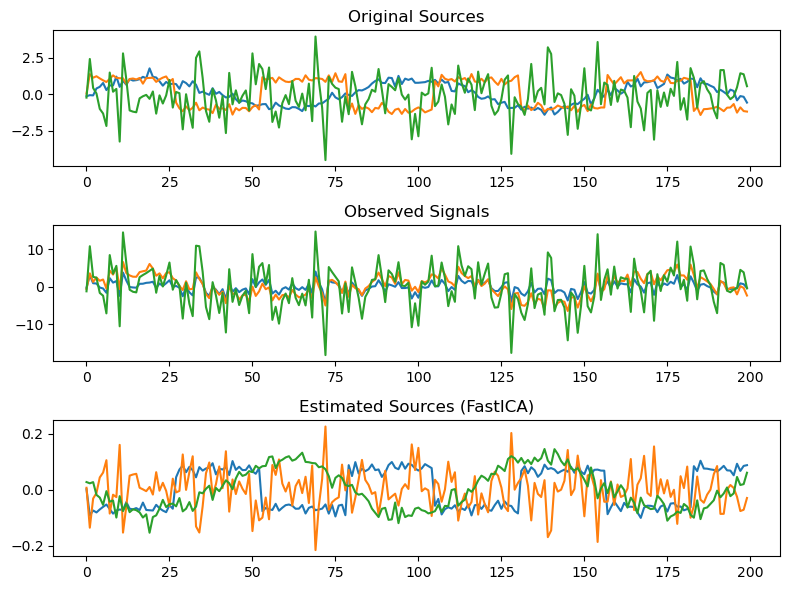

In [4]:
# Plot the results
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.title('Original Sources')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Observed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Estimated Sources (FastICA)')
plt.plot(S_)

plt.tight_layout()
plt.show()
